In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Exploratory Data Analysis (EDA)

In [45]:
df = pd.read_csv('final_cleaned_dataset.csv')
df.head()

,accident_id,date_time,location_lat,location_lon,severity,temperature,rain,visibility,Speed_Limit,traffic
0,A-7182628,2020-04-17 09:29:30,26.706900,-80.119360,0.0,25.30,4.4,10.0,45,2
1,A-5404588,2022-04-21 10:01:00,38.781024,-121.265820,1.0,15.25,15.8,10.0,45,1
2,A-156000,2016-08-12 16:45:00,33.985249,-84.269348,2.0,26.75,1.0,10.0,45,0
3,A-1871277,2019-09-20 15:22:16,47.118706,-122.556908,2.0,16.55,3.2,10.0,60,0
4,A-2031222,2019-06-03 16:55:43,33.451355,-111.890343,1.0,28.65,0.0,10.0,25,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35323 entries, 0 to 35322
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accident_id   35323 non-null  object 
 1   date_time     35323 non-null  object 
 2   location_lat  35323 non-null  float64
 3   location_lon  35323 non-null  float64
 4   severity      35323 non-null  float64
 5   temperature   35323 non-null  float64
 6   rain          35323 non-null  float64
 7   visibility    35323 non-null  float64
 8   Speed_Limit   35323 non-null  object 
 9   traffic       35323 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [47]:
df.describe()

,location_lat,location_lon,severity,temperature,rain,visibility,traffic
count,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000,35323.000000
mean,36.177430,-94.784847,1.165784,15.885800,3.561054,9.097499,0.579990
std,5.088028,17.394795,0.393206,9.556069,8.263808,2.706853,0.507481
min,24.602680,-124.420091,0.000000,-31.350000,0.000000,0.000000,0.000000
25%,33.350745,-117.244550,1.000000,9.850000,0.000000,10.000000,0.000000
50%,35.783680,-87.861748,1.000000,17.200000,0.000000,10.000000,1.000000
75%,40.101671,-80.386531,1.000000,23.500000,2.900000,10.000000,1.000000
max,48.924149,-68.226869,2.000000,40.700000,119.700000,80.000000,2.000000


In [77]:
severity_counts = df['severity'].value_counts().sort_index()
print(severity_counts)

severity
0.0      288
1.0    28891
2.0     6141
Name: count, dtype: int64


In [48]:
df['Speed_Limit'] = pd.to_numeric(df['Speed_Limit'], errors='coerce')


In [49]:
df.isnull().sum()

accident_id     0
date_time       0
location_lat    0
location_lon    0
severity        0
temperature     0
rain            0
visibility      0
Speed_Limit     3
traffic         0
dtype: int64

In [50]:
df = df.dropna(subset=['Speed_Limit'])

In [51]:
df.isnull().sum()

accident_id     0
date_time       0
location_lat    0
location_lon    0
severity        0
temperature     0
rain            0
visibility      0
Speed_Limit     0
traffic         0
dtype: int64

In [52]:
df.nunique()

accident_id     35320
date_time       35219
location_lat    33819
location_lon    33806
severity            3
temperature      1129
rain              607
visibility         39
Speed_Limit        22
traffic             3
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

### Correlation Heatmap

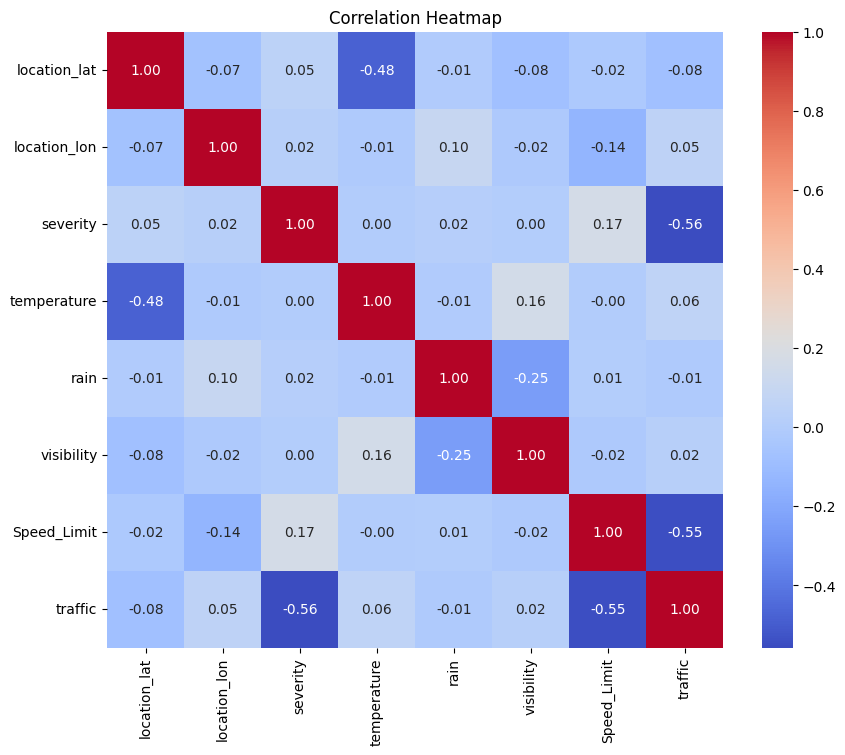

In [55]:
df_corr = df.drop(columns=['accident_id', 'date_time'], errors='ignore')
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


### Scatter Plots

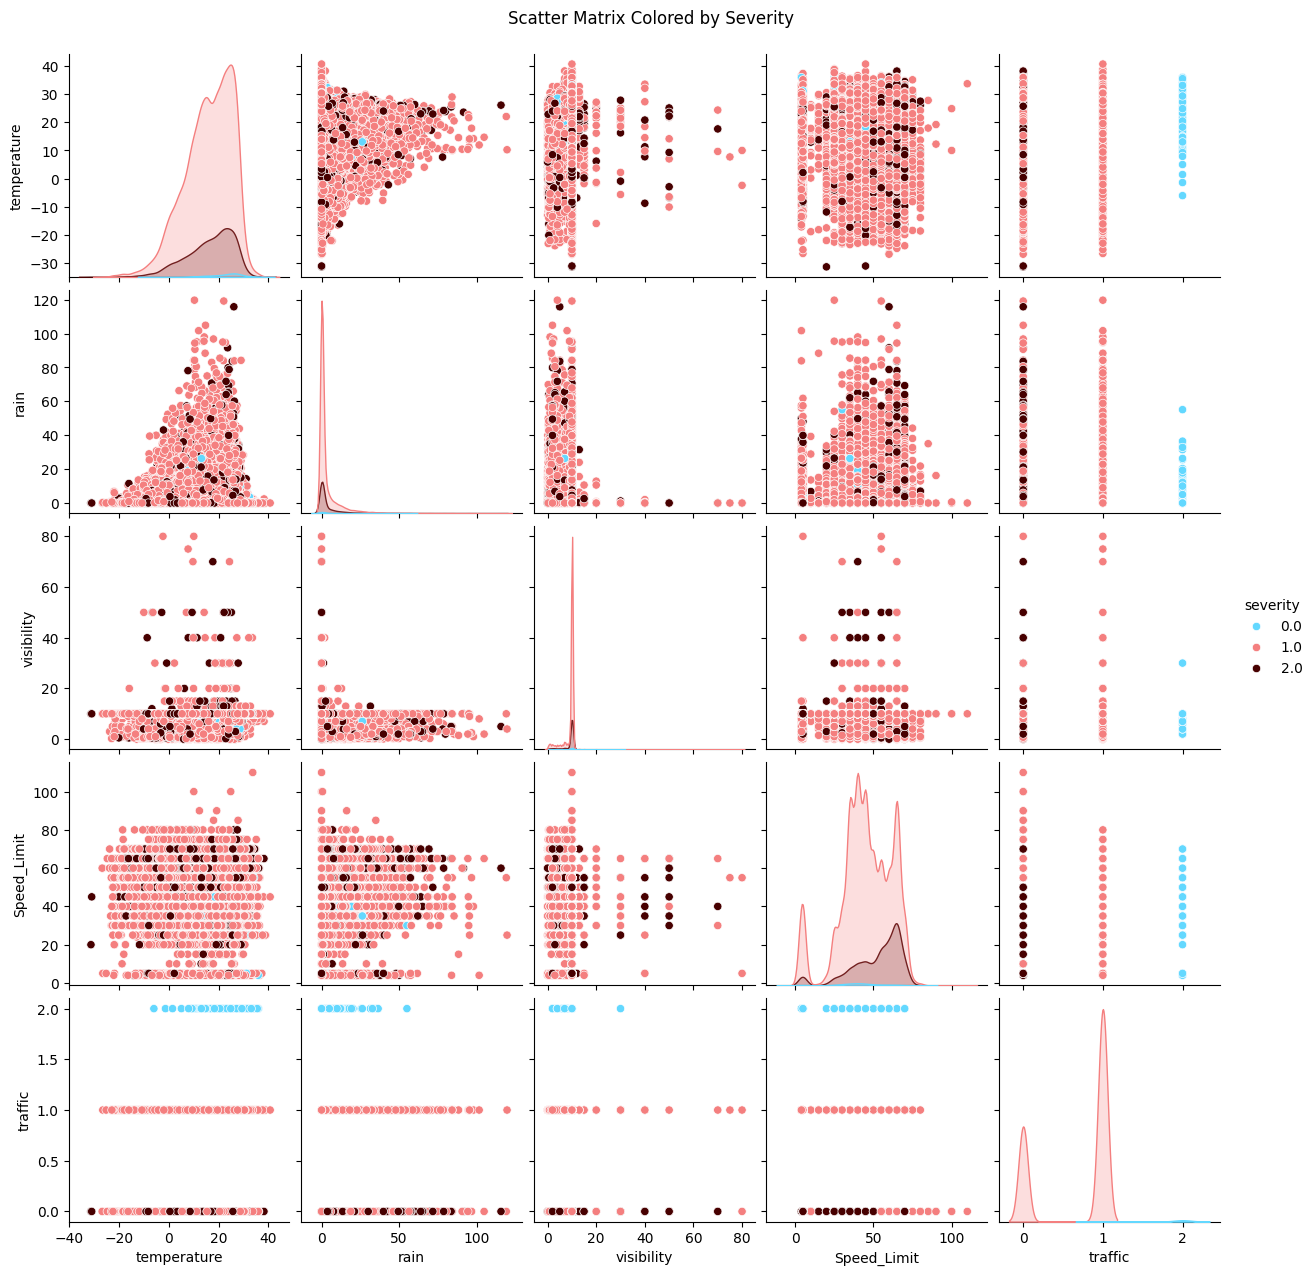

In [60]:
custom_palette = {0.0: "#63D8FF", 1.0: "#F47F7F", 2.0: "#470000"}
scatter_features = ['temperature', 'rain', 'visibility', 'Speed_Limit', 'traffic']
pairplot = sns.pairplot(df[scatter_features + ['severity']].dropna(),hue='severity', diag_kind='kde', palette=custom_palette)

pairplot.fig.suptitle("Scatter Matrix Colored by Severity", y=1.02)
plt.show()

### Box plot

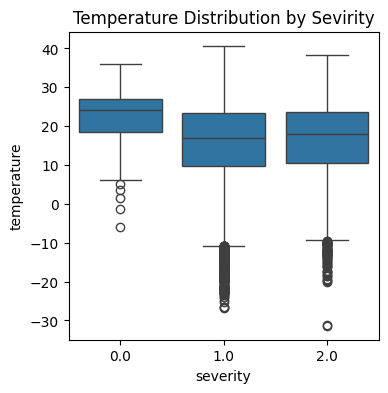

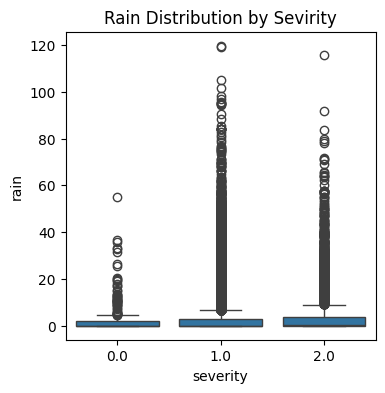

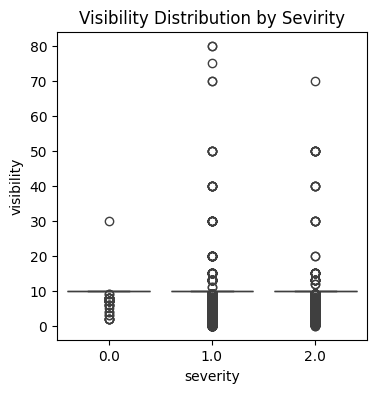

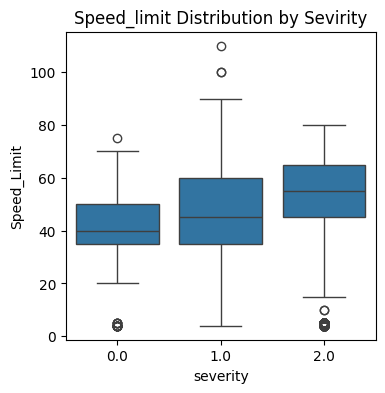

In [76]:
features = ['temperature',
            'rain',
            'visibility',
            'Speed_Limit',
            ]
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='severity', y=feature, data=df)
    plt.title(f"{feature.capitalize()} Distribution by Sevirity")
    plt.show()

### Count Plot

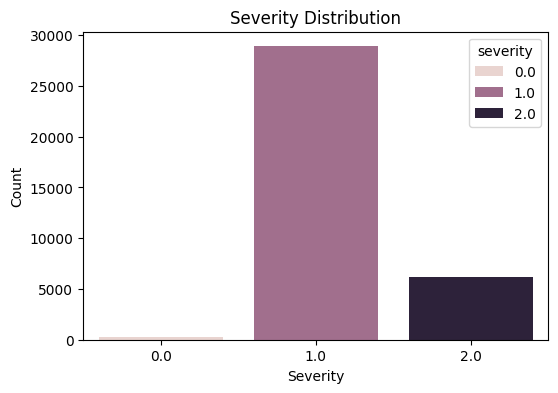

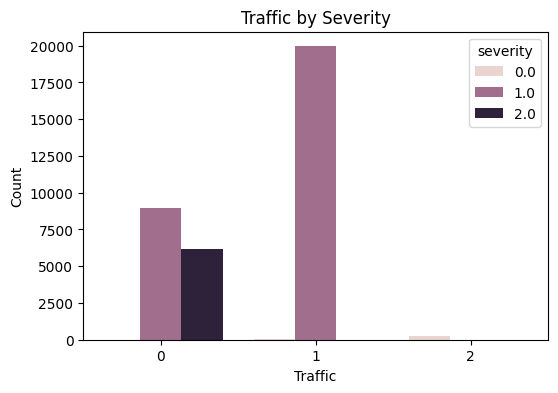

In [73]:
features = ['severity','traffic',]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='severity', data=df)
    plt.title(f'{feature.capitalize()} by Severity' if feature != 'severity' else 'Severity Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()



### Histogram

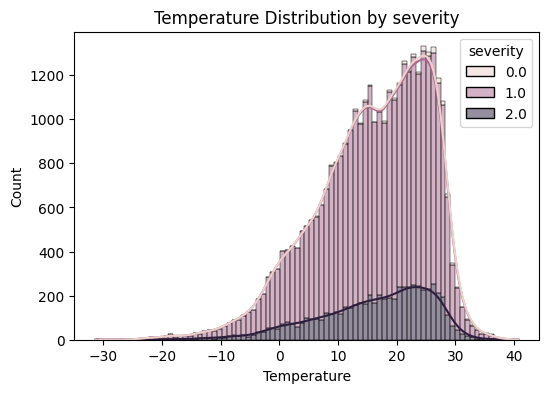

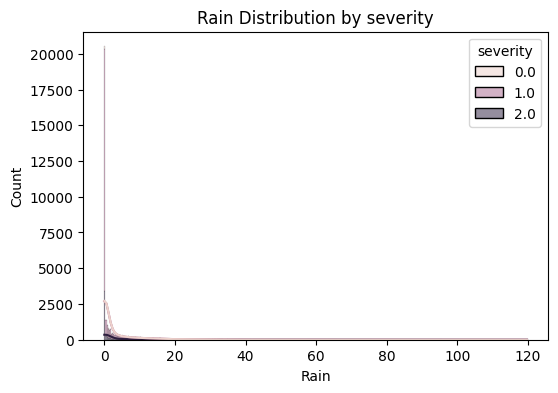

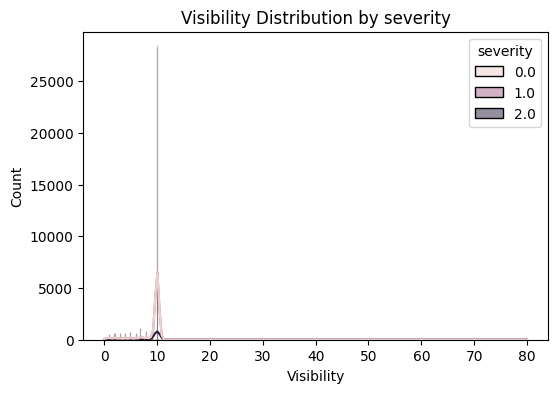

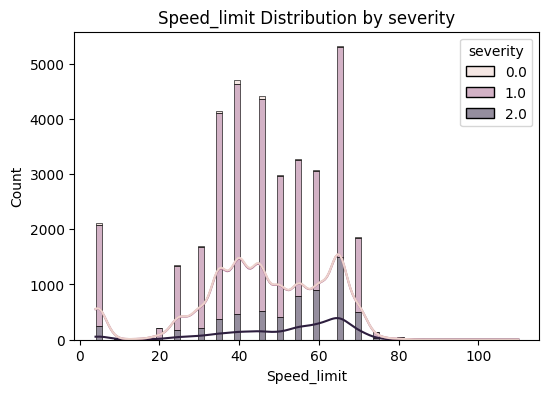

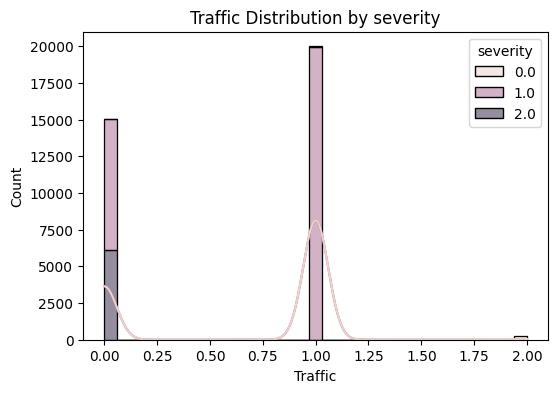

In [74]:
features = ['temperature',
            'rain',
            'visibility',
            'Speed_Limit',
            'traffic']
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=df, x=feature, hue='severity', multiple='stack', kde=True)
    plt.title(f'{feature.capitalize()} Distribution by severity')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()